# Searching for directions for development of the "unnecessary things" application

1. [Open data](#start)
2. [Preprocessing ](#preprocessing)
    *[2.1 delete duplicates](#del_dublicates)
    *[2.2 cheking for gaps](#gap)
    *[2.3 if possible, correct or remove gaps](#del_gap)
    *[2.4 merge all type search](#search)
    *[2.5 merge contacts_show and show_contacts](#contacts_show)
    *[2.6 check the composition for compliance with the description](#chek)
3. [User behavior research](#research)
    *[3.1 retention rate research](#retention)
    *[3.2 research time spent in the application ](#time)
    *[3.3 research of action frequency](#frequency)
    *[3.4  research of conversion to target action — view contacts](#conversion)
    *[Conclusions about general user behavior](#fist_conclusion)
4. [Segmentation by day of the week](#segment)
5. [For each group, calculate metrics:]
     *[retention rate](#retantion_segment)
     *[conversion to target action — view contacts](#conversion_segment)
     *[Conclusions about groups](#second_conclusion)
6. [Statistical hypothesis testing](#hypotheses)
     *[conversion on weekends is equal to conversion on weekdays]
7. [Conclusion](#general_conclusion)




*[Presentation].(https://disk.yandex.ru/i/d4OAn2wlO2AK_Q)

In [1]:

import pandas as pd #  importing the pandas library
import datetime as dt #  importing the data and time library
import numpy as np #  importing the numpy library
import matplotlib.pyplot as plt #  importing library for plotting grafs
import scipy.stats as stats #  importing  library for statistic research
#import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest
import math as mth# importing the math library
from time import strftime # importing the time library
import seaborn as sns # importing the seaborn library for quick plotting

##  Open the data file and review the general information. <a id="start"></a> 

In [2]:
#загружаем данные
try:
    data = pd.read_csv('https:/.../mobile_dataset.csv') # open net link
except:
    data = pd.read_csv('mobile_dataset.csv', sep=',') #open local file


In [3]:
data.info() # show gaeneral information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [4]:
data.head() #show top 5 lines

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [5]:
try:
    sources = pd.read_csv('https:// ... ')
except:
    sources = pd.read_csv('mobile_soures.csv')
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [6]:
sources.head() #show top 5 lines


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


## 2. Preprocessing <a id="preprocessing"></a> 

In [7]:
# rename the column names to simpler ones
data.columns = ['time', 'event', 'id']
data.head()

,time,event,id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [8]:
# rename the column names to simpler ones
sources.columns = ['id','source']
sources.head()

,id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [9]:
#composition of the tdata
data.describe()

,time,event,id
count,74197,74197,74197
unique,74197,16,4293
top,2019-10-07 00:00:00.431357,tips_show,cb36854f-570a-41f4-baa8-36680b396370
freq,1,40055,478


In [10]:
#composition of the sources
sources.describe()

,id,source
count,4293,4293
unique,4293,3
top,020292ab-89bc-4156-9acf-68bc2783f894,yandex
freq,1,1934


In [11]:
# change format of columns time to datetime поменяем формат солбца времени на datetime
data['time'] = pd.to_datetime(data['time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    74197 non-null  datetime64[ns]
 1   event   74197 non-null  object        
 2   id      74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [12]:
# max time
data['time'].max()

Timestamp('2019-11-03 23:58:12.532487')

In [13]:
# min time
data['time'].min()

Timestamp('2019-10-07 00:00:00.431357')

Most likely there are no gaps. The number of ids in both files is the same. The dataset contains data for the period from 7.10 to 3.11

### 2.1 dell duplicates <a id="del_dublicates"></a> 

In [14]:
data['event'] = data['event'].str.lower() # change register to lower

In [15]:
# cheking for duplicates in data
data.duplicated().sum()

0

In [16]:
# cheking for duplicates in sources
sources.duplicated().sum()

0

There are no gaps

### 2.2 cheking for the gaps and null<a id="gap"></a> 

In [17]:
data.isna().sum() #cheking for gaps in data

time     0
event    0
id       0
dtype: int64

In [18]:
sources.isna().sum() #cheking for gaps in sources

id        0
source    0
dtype: int64

In [19]:
#cheking for null in data
data.isnull().sum()

time     0
event    0
id       0
dtype: int64

In [20]:
#cheking for null in sources
sources.isnull().sum()

id        0
source    0
dtype: int64

There are no gaps and null

### 2.3 If possible, we will correct or remove gaps<a id="del_gap"></a> 

### 2.4 merge all search<a id="search"></a> 

In [21]:
data['event'] = data['event'].replace(regex=['search_\d'], value='search')

### 2.5 merge contacts_show и show_contacts<a id="contacts_show"></a> 

In [22]:
data['event'] = data['event'].replace('show_contacts', 'contacts_show')

### 2.6 check the composition for compliance with the description<a id="chek"></a> 

In [23]:
#show unique events
data['event'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

In [24]:
#how uique sources
sources['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

data corresponds to description

## 3. User behavior research<a id="research"></a> 

### 3.1 retention rate researche <a id="retention"></a>

In [25]:
data = data.sort_values(['id', 'time']) # sort data on id and time
data.head()

,time,event,id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349


In [26]:
#time difference between actions in raw data
dif = data.groupby('id')['time'].diff().to_frame (name='dif')

dif = dif.iloc[1:] # show only data. first line is 0
dif.head()

,dif
806,0 days 00:00:45.063550
809,0 days 00:00:34.669580
820,0 days 00:02:15.012972
830,0 days 00:02:10.182041
831,0 days 00:00:12.294838


In [27]:
dif.describe() # stat description by dif

,dif
count,69904
mean,0 days 03:53:01.169952121
std,1 days 01:32:57.259354294
min,0 days 00:00:00.000001
25%,0 days 00:00:23.594245250
50%,0 days 00:01:10.535313
75%,0 days 00:03:00.300498750
max,26 days 13:49:54.853516


<div class="alert alert-info">  In raw data, the vast majority of actions will take about a minute. Moreover, the average period between actions is almost 4 hours. It can be assumed that the break between actions within sessions rarely exceeds 10 minutes. The true value lies somewhere between 10 minutes and 4 hours. For most situations, 30 minutes is probably correct. </div> 

In [28]:
# group the dataset  by users and time spent in the application with a difference of 30 minutes
g = (data.groupby('id')['time'].diff() > pd.Timedelta('30Min')).cumsum()
#create a column with the session ID
data['session_id'] = data.groupby(['id', g], sort=False).ngroup() + 1
data

,time,event,id,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
...,...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10368
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10368
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10368
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10368


In [29]:
#create a table with the date of first activity for each user
first_ts = data.groupby('id').agg({'time': 'first'}).rename(columns={'time':'signup'}).reset_index()
# change type to date
first_ts['signup']=first_ts['signup'].dt.date
first_ts # show table

,id,signup
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21


In [30]:
#merge tables to add columns with first action
data = data.merge(first_ts, left_on='id', right_on='id')

In [31]:
#create column with date of action
data['ref_date'] = data['time'].dt.date
data.head()

,time,event,id,session_id,signup,ref_date
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07


In [32]:
#difference between of action and first action
data['seniority'] = (data['ref_date'] - data['signup']).dt.days + 1
# number of unique events
data['seniority'].value_counts()

1     44161
2      5933
3      3141
4      2561
5      1939
6      1803
8      1795
9      1564
7      1543
11     1207
12     1138
14      994
10      949
15      833
16      795
13      626
17      513
18      453
19      413
20      326
23      325
22      305
25      207
26      196
24      178
21      147
28       97
27       55
Name: seniority, dtype: int64

In [33]:
#group on first action and "life" of the client
group = data.groupby(['signup', 'seniority'])
# size of cohort for each duration of lif of the clientаем 
cohort_data = group['id'].size().reset_index()
cohort_data

,signup,seniority,id
0,2019-10-07,1,2545
1,2019-10-07,2,453
2,2019-10-07,3,201
3,2019-10-07,4,190
4,2019-10-07,5,87
...,...,...,...
399,2019-11-01,2,252
400,2019-11-01,3,94
401,2019-11-02,1,811
402,2019-11-02,2,129


In [34]:
# pivot table of signup and life time
cohort_counts = cohort_data.pivot(index='signup', columns='seniority', values='id')
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
signup,,,,,,,,,,,,,,,,,,,,,
2019-10-07,2545.0,453.0,201.0,190.0,87.0,90.0,103.0,119.0,61.0,88.0,...,29.0,119.0,8.0,109.0,144.0,66.0,80.0,140.0,11.0,97.0
2019-10-08,2046.0,249.0,176.0,134.0,19.0,48.0,77.0,65.0,87.0,66.0,...,17.0,34.0,38.0,6.0,14.0,28.0,97.0,17.0,44.0,NaN
2019-10-09,1577.0,113.0,147.0,30.0,27.0,68.0,56.0,61.0,96.0,95.0,...,2.0,25.0,33.0,38.0,25.0,47.0,17.0,39.0,NaN,NaN
2019-10-10,1764.0,320.0,105.0,121.0,225.0,178.0,92.0,86.0,101.0,68.0,...,32.0,27.0,18.0,17.0,29.0,13.0,13.0,NaN,NaN,NaN
2019-10-11,1342.0,142.0,79.0,101.0,91.0,67.0,41.0,38.0,5.0,NaN,...,173.0,87.0,21.0,31.0,30.0,24.0,NaN,NaN,NaN,NaN
2019-10-12,1457.0,481.0,105.0,66.0,69.0,101.0,129.0,82.0,74.0,26.0,...,11.0,12.0,3.0,73.0,83.0,NaN,NaN,NaN,NaN,NaN
2019-10-13,1776.0,240.0,107.0,86.0,94.0,66.0,24.0,42.0,31.0,49.0,...,72.0,11.0,8.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-14,2099.0,203.0,99.0,116.0,105.0,142.0,105.0,66.0,67.0,53.0,...,9.0,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-15,1895.0,283.0,111.0,119.0,60.0,127.0,46.0,64.0,88.0,48.0,...,31.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# max data with reghard of 7 day horizont 
max_data = len(cohort_counts[1])-7
max_data


21

In [36]:
# cohort with hotisont 7 day
cohort_counts_group = cohort_counts.iloc[0:max_data,1:7]
cohort_counts_group

seniority,2,3,4,5,6,7
signup,,,,,,
2019-10-07,453.0,201.0,190.0,87.0,90.0,103.0
2019-10-08,249.0,176.0,134.0,19.0,48.0,77.0
2019-10-09,113.0,147.0,30.0,27.0,68.0,56.0
2019-10-10,320.0,105.0,121.0,225.0,178.0,92.0
2019-10-11,142.0,79.0,101.0,91.0,67.0,41.0
2019-10-12,481.0,105.0,66.0,69.0,101.0,129.0
2019-10-13,240.0,107.0,86.0,94.0,66.0,24.0
2019-10-14,203.0,99.0,116.0,105.0,142.0,105.0
2019-10-15,283.0,111.0,119.0,60.0,127.0,46.0


In [37]:
#calculate  retention
retention = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention

seniority,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
signup,,,,,,,,,,,,,,,,,,,,,
2019-10-07,1.0,0.178,0.079,0.075,0.034,0.035,0.040,0.047,0.024,0.035,...,0.011,0.047,0.003,0.043,0.057,0.026,0.031,0.055,0.004,0.038
2019-10-08,1.0,0.122,0.086,0.065,0.009,0.023,0.038,0.032,0.043,0.032,...,0.008,0.017,0.019,0.003,0.007,0.014,0.047,0.008,0.022,NaN
2019-10-09,1.0,0.072,0.093,0.019,0.017,0.043,0.036,0.039,0.061,0.060,...,0.001,0.016,0.021,0.024,0.016,0.030,0.011,0.025,NaN,NaN
2019-10-10,1.0,0.181,0.060,0.069,0.128,0.101,0.052,0.049,0.057,0.039,...,0.018,0.015,0.010,0.010,0.016,0.007,0.007,NaN,NaN,NaN
2019-10-11,1.0,0.106,0.059,0.075,0.068,0.050,0.031,0.028,0.004,NaN,...,0.129,0.065,0.016,0.023,0.022,0.018,NaN,NaN,NaN,NaN
2019-10-12,1.0,0.330,0.072,0.045,0.047,0.069,0.089,0.056,0.051,0.018,...,0.008,0.008,0.002,0.050,0.057,NaN,NaN,NaN,NaN,NaN
2019-10-13,1.0,0.135,0.060,0.048,0.053,0.037,0.014,0.024,0.017,0.028,...,0.041,0.006,0.005,0.017,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-14,1.0,0.097,0.047,0.055,0.050,0.068,0.050,0.031,0.032,0.025,...,0.004,0.000,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-15,1.0,0.149,0.059,0.063,0.032,0.067,0.024,0.034,0.046,0.025,...,0.016,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# creat retantion group with 7 day horizont 
retention_group = retention.iloc[0:max_data,1:7]

retention_group# show 

seniority,2,3,4,5,6,7
signup,,,,,,
2019-10-07,0.178,0.079,0.075,0.034,0.035,0.040
2019-10-08,0.122,0.086,0.065,0.009,0.023,0.038
2019-10-09,0.072,0.093,0.019,0.017,0.043,0.036
2019-10-10,0.181,0.060,0.069,0.128,0.101,0.052
2019-10-11,0.106,0.059,0.075,0.068,0.050,0.031
2019-10-12,0.330,0.072,0.045,0.047,0.069,0.089
2019-10-13,0.135,0.060,0.048,0.053,0.037,0.014
2019-10-14,0.097,0.047,0.055,0.050,0.068,0.050
2019-10-15,0.149,0.059,0.063,0.032,0.067,0.024


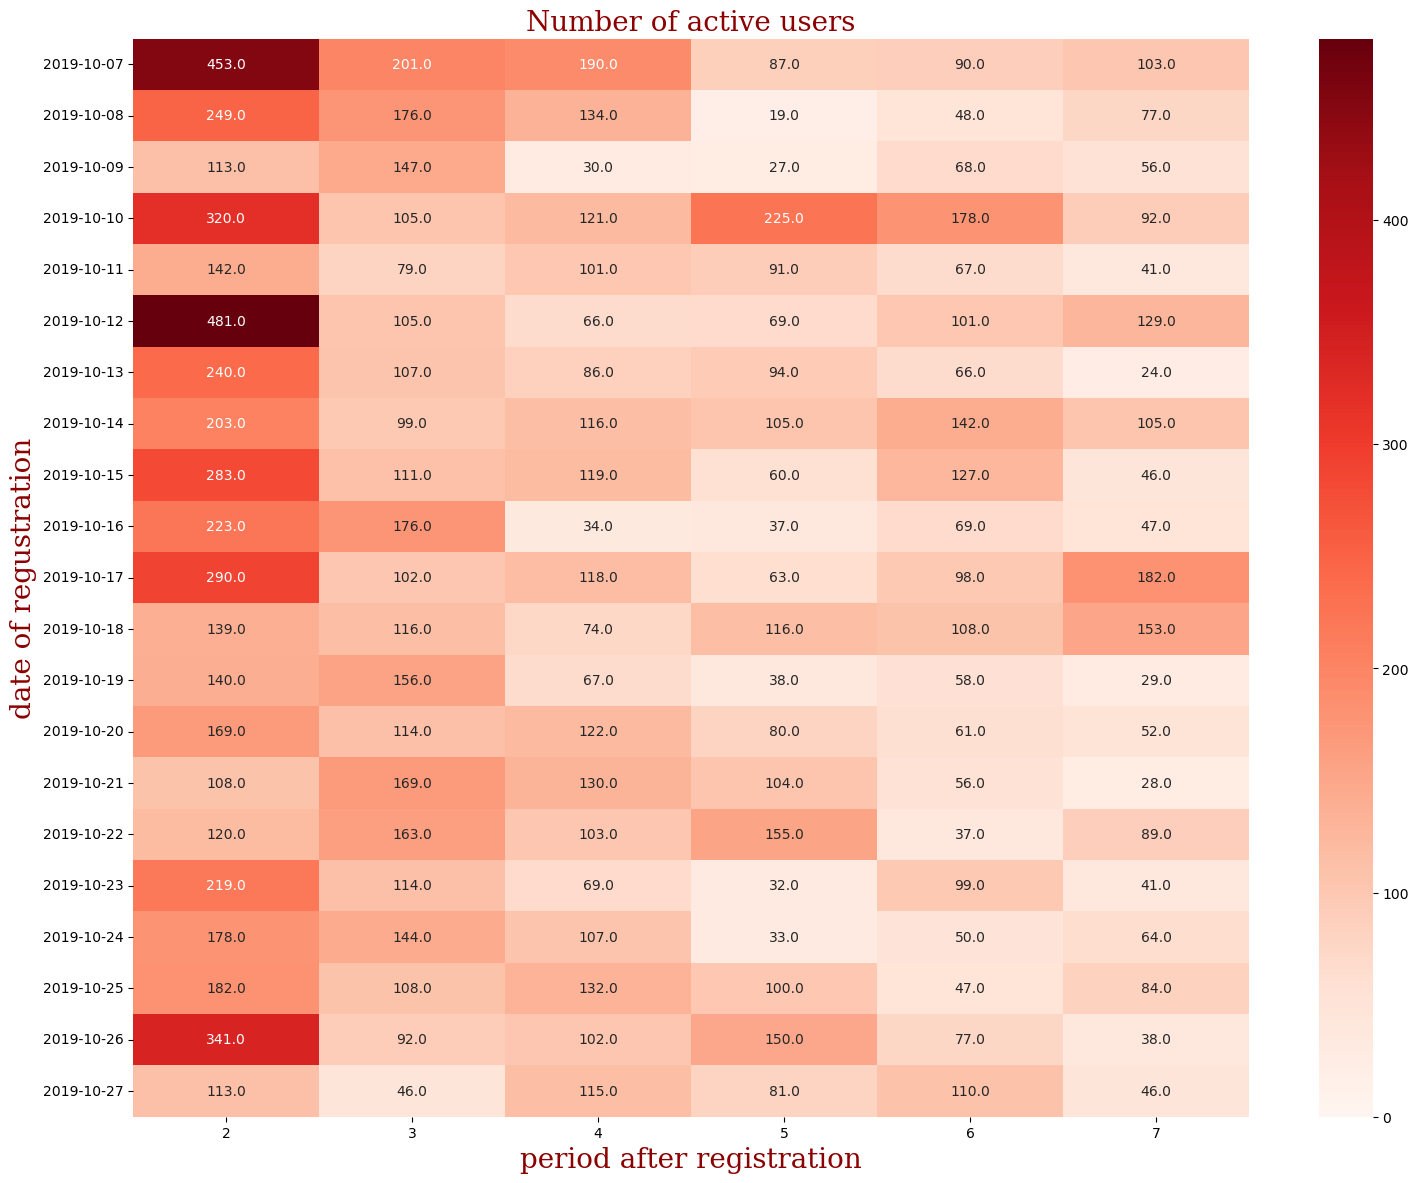

In [39]:
#it's test
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }


#heat map on count of active users
plt.figure(figsize=(18,14))
plt.title('Number of active users',fontdict=font)
ax = sns.heatmap(data=cohort_counts_group, annot=True, fmt=".1f", vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts_group.index)
fig=ax.get_figure()
fig.savefig("Active_users.png")
plt.xlabel('period after registration', fontdict=font)
plt.ylabel('date of regustration', fontdict=font)
plt.show()

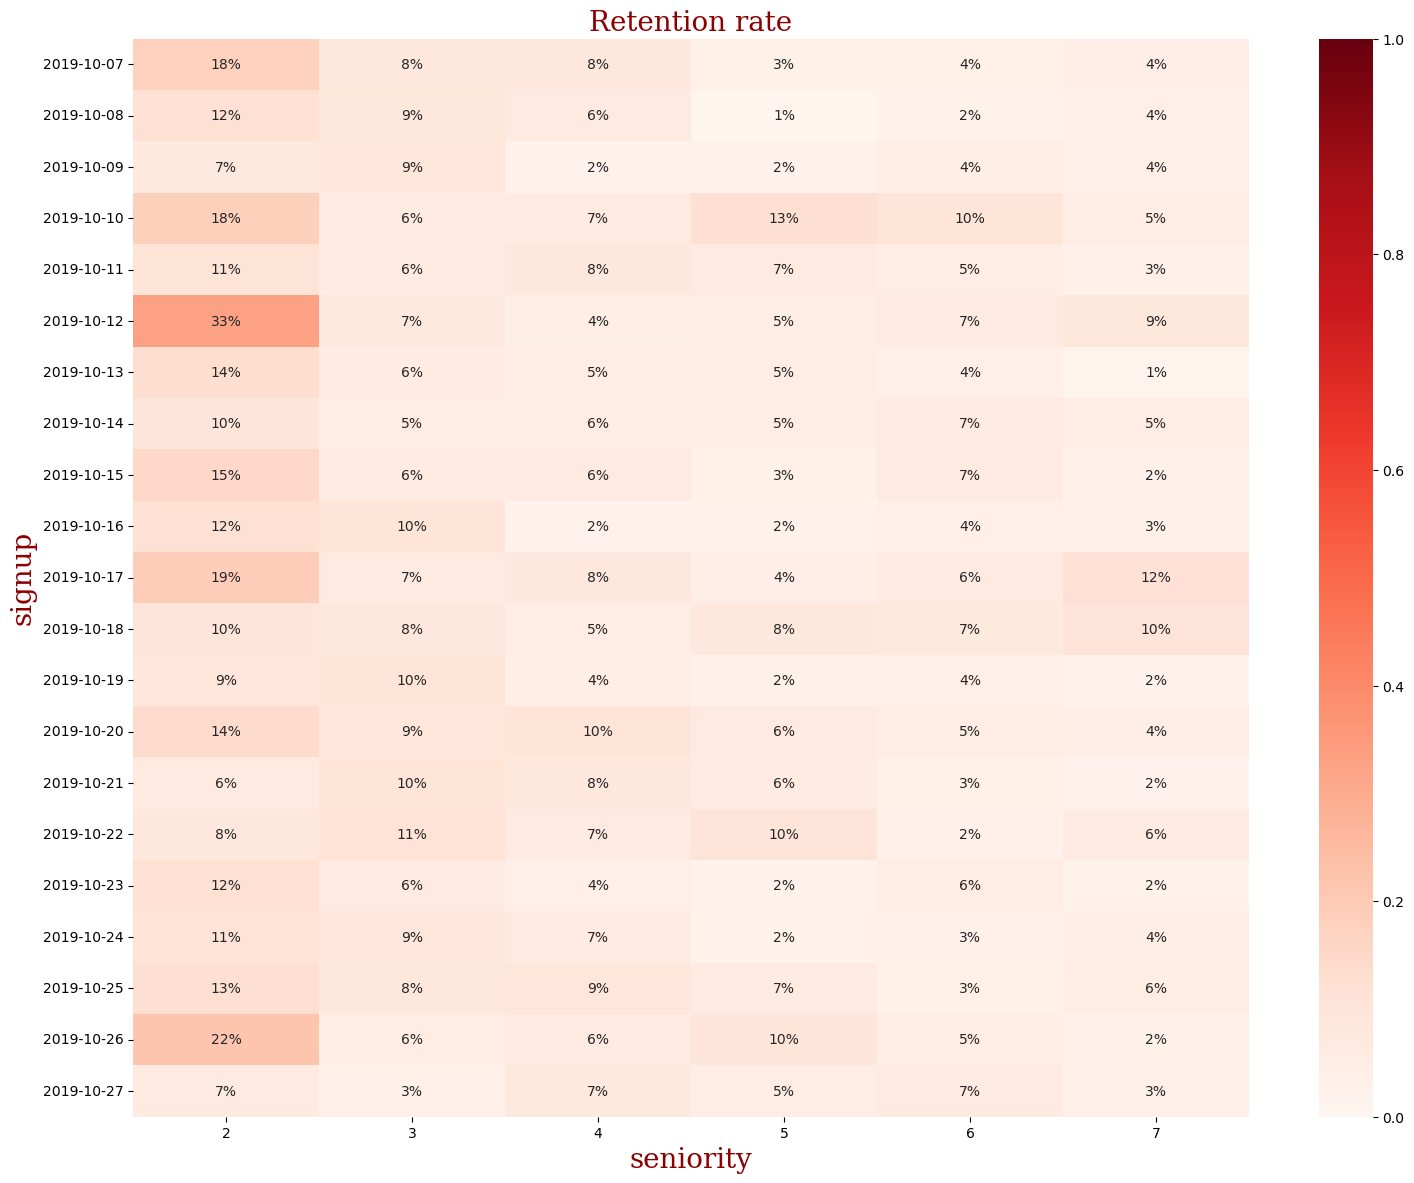

In [40]:
# heat map of retantion rate in cohort
plt.figure(figsize=(18,14))
plt.title('Retention rate',fontdict=font)
plt.xlabel('Период после регистарции', fontdict=font)
plt.ylabel('Дата регистарции', fontdict=font)
ax = sns.heatmap(data=retention_group, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_group.index)
fig=ax.get_figure()

fig.savefig("Retention_Rate.png")
plt.show()

In [41]:
#function for retantion rate calculation and heat map
def retantion(data, mark):
    #group by first action and life time for clientсгруппируем по первой активности и "жизнью" клиента 
    group = data.groupby(['signup', 'seniority'])
    # cohort size for each life time расчитаем размер когорт на каждом этапе длительности жизни клиента
    cohort_data = group['id'].size().reset_index()
    # pivot table  
    cohort_counts = cohort_data.pivot(index='signup', columns='seniority', values='id')
    # retention
    retention = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
    # оценим макисмальную дату для анализа с учетом горизонта событий в 7 дней
    max_data = len(retention[1])-7
    #summary table for retantion
    retention_group = retention.iloc[0:max_data,1:7] 
    # heat map for retantion rate in cohort
    plt.figure(figsize=(18,14))
    plt.title('Retention Table')
    ax = sns.heatmap(data=retention_group, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
    ax.set_yticklabels(retention_group.index)
    fig=ax.get_figure()
    fig.savefig("Retention_Rate"+mark+".png")
    plt.show()

<div class="alert alert-info">  The most visitors were on October 12th.
On the second day, the retention rate ranges from 6 to 33%. The best clients returned on October 12th.
On day 7, the retention rate ranges from 2 to 12%.
The spread is quite large. It is worth finding the reasons for the scatter.
It’s interesting that this happened on October 12th.
<div>  


### 3.2 explore time spent in the application<a id="time"></a>

In [42]:
data.head() #show first 5 line in data

,time,event,id,session_id,signup,ref_date,seniority
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07,1
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07,1
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07,1
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07,1
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07,2019-10-07,1


In [43]:
#number of sessions for each users
number_session = data.groupby('id').agg({'session_id':'nunique'}).reset_index().sort_values(by='session_id')
number_session

,id,session_id
2146,80a9887a-d45f-44a2-9473-1446f68b9c16,1
2153,810b809f-004e-4b90-91a5-a67c8ba21d13,1
2154,8112fc93-1a41-4348-9fb5-ef2e2abebf03,1
2155,8124a653-0f37-4278-a9f1-32351a906287,1
2157,814ee06b-db5c-4cca-a89b-b7770b334e0e,1
...,...,...
3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,38
1668,6383ff6a-04b8-4562-a98f-bb4f760d3c39,45
3397,cb36854f-570a-41f4-baa8-36680b396370,50
401,1580911b-65db-4f1a-be7e-1ca39becac30,52


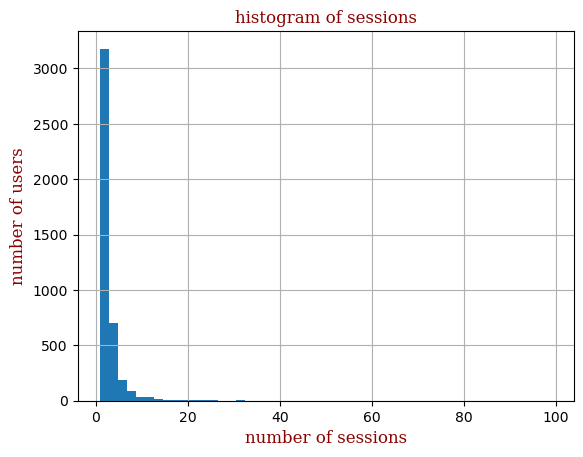

In [44]:
# histogram for number sessions
font_hist = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
number_session['session_id'].hist(bins=50)
plt.title('histogram of sessions',fontdict=font_hist)
plt.xlabel('number of sessions', fontdict=font_hist)
plt.ylabel('number of users', fontdict=font_hist)
plt.show()

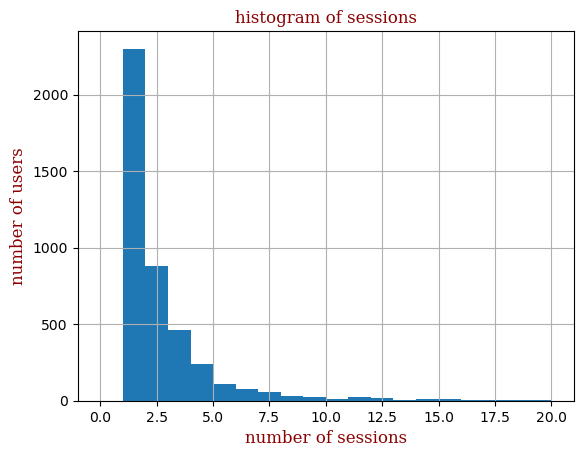

In [45]:
#clarify the range
number_session['session_id'].hist(bins=20, range = (0,20))

plt.title('histogram of sessions',fontdict=font_hist)
plt.xlabel('number of sessions', fontdict=font_hist)
plt.ylabel('number of users', fontdict=font_hist)
plt.savefig("hist_session.png")
plt.show()

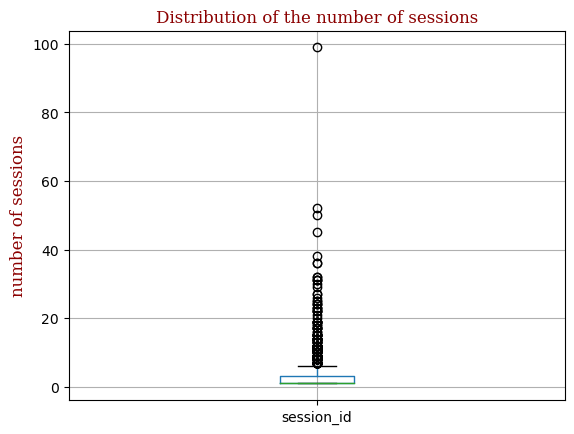

In [46]:
#boxplot
number_session.boxplot(column = 'session_id') # строим диаграмму размаха
plt.title('Distribution of the number of sessions',fontdict=font_hist)
plt.ylabel('number of sessions', fontdict=font_hist)
fig.savefig("Number_session.png")
plt.show()

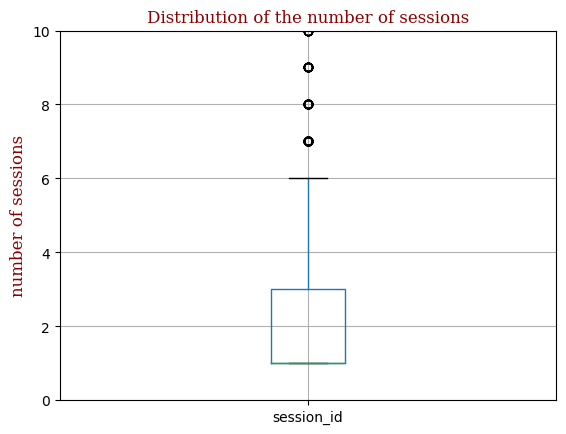

In [47]:
plt.ylim(0,10) #  clarify the range
number_session.boxplot(column = 'session_id') # boxplot
plt.title('Distribution of the number of sessions',fontdict=font_hist)
plt.ylabel('number of sessions', fontdict=font_hist)
plt.show()

In [48]:
#median of values
number_session['session_id'].median()

1.0

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        74197 non-null  datetime64[ns]
 1   event       74197 non-null  object        
 2   id          74197 non-null  object        
 3   session_id  74197 non-null  int64         
 4   signup      74197 non-null  object        
 5   ref_date    74197 non-null  object        
 6   seniority   74197 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 4.5+ MB


In [50]:
#difference in time  between action in row data
session_time = data.groupby(['id','session_id'])['time'].diff().to_frame (name='dif')

session_time = dif.iloc[1:]
session_time.head()

,dif
809,0 days 00:00:34.669580
820,0 days 00:02:15.012972
830,0 days 00:02:10.182041
831,0 days 00:00:12.294838
832,0 days 00:00:47.821378


In [51]:
# time difference calculation function
def dif_time(s):
    return round(((s.max() - s.min()).total_seconds())/60,2)#.strftime("%M")

In [ ]:
#group by sessions and calculate duration of each session
number_session_time = data.groupby(['session_id']).agg({'time':dif_time}).reset_index()
number_session_time.head()

In [ ]:
#describe the sessions
number_session_time.describe()

In [ ]:
# max time session
number_session_time['time'].max()

In [ ]:
#  clarify the range
number_session_time.boxplot(column = 'time') # boxplot
plt.title('Distribution of session duration',fontdict=font_hist)
plt.ylabel('Session duration', fontdict=font_hist)
plt.show()

<div class="alert alert-info"> Usually people do it in 5 minutes. This suggests that either people quickly find what they need, or quickly lose interest. During the period under review, a typical user made only one session. Almost no one performed more than 6 sessions. Although there are also record holders with 99 sessions. This looks too brightly skewed. There is clearly room for growth here.</div> 

### 3.3 explore the frequency of actionsa id="frequency"></a>

Let's calculate how much time it takes on average to perform one action within each session. Then let's look at the overall distribution. We will consider within each session to exclude the period of time between sessions.

In [ ]:
data.head()

In [ ]:
#calculate the period between actions and group them by sessions
agg_func_selection = {'time': ['min', 'max','nunique']}
frq = data.groupby('session_id').agg(agg_func_selection)
#change to one-level table
frq = frq['time'].reset_index()
#change time into seconds
frq['max'] = frq['max'].map(lambda x: x.timestamp())
frq['min'] = frq['min'].map(lambda x: x.timestamp())
#calculate period between actions into sesions
frq['time_delta'] = (frq['max']-frq['min'])
#calculate avearage action duration seconds
frq['events_sec'] = frq['time_delta']/frq['nunique']

frq


In [ ]:
#quartile distribution
frq['events_sec'].describe()

In [ ]:
#clarify the range = (0,20)
frq['events_sec'].hist(bins=20)

plt.title('Histogram of actions',fontdict=font_hist)
plt.xlabel('Duration of actions, seconds', fontdict=font_hist)
plt.ylabel('Number of users', fontdict=font_hist)
plt.savefig("hist_events_sec.png")
plt.show()

In [ ]:
#boxplot
frq.boxplot(column = 'events_sec') 
plt.title('Distribution of sessions duration',fontdict=font_hist)
plt.ylim(0,400) #  indicate the range of values
plt.savefig("events_sec.png")
plt.show()

<div class="alert alert-info">  
Typically the action takes about 1 minute. It's interesting to understand actions in 0 seconds. Most likely this is a session consisting of one action. If this action leads to conversion to the target action, then everything is perfect. If not, then you need to figure it out.
Users rarely hang for more than two minutes. This means there are no significant technical problems.
The small number of short actions indicates that, in general, users quickly move on to information of interest to them. On the other hand, this may indicate that users need more time to figure it out. It may be worth double-checking the usability of the application.

</div> 


 study the frequency of actions depending on the week of the day

In [ ]:
data.head()

In [ ]:
#determine the number of the day of the week
data['day_of_week'] = data['time'].map(lambda x: x.weekday())
data.head()

In [ ]:
#group by day of week
frq_day =data.groupby(['day_of_week','session_id']).agg(agg_func_selection).reset_index()
#change to one level table
frq_day.columns = [tup[1] if tup[1] else tup[0] for tup in frq_day.columns]
#change time to seconds
frq_day['max'] = frq_day['max'].map(lambda x: x.timestamp())
frq_day['min'] = frq_day['min'].map(lambda x: x.timestamp())
# calculate time delta into each sessions period
frq_day['time_delta'] = (frq_day['max']-frq_day['min']).round(2)
# calculate avearage time of action
frq_day['events_sec'] = round(frq_day['time_delta']/frq_day['nunique'],2)


frq_day.head()

In [ ]:
# calculate percentile of 5%
np.percentile (frq_day['events_sec'], 5)

In [ ]:
#function to calculate percentile of 5%
def percentile_5(e):
    return np.percentile(e, 5)

In [ ]:
#function to calculate percentile of 95%
def percentile_95(e):
    return np.percentile(e, 95)

In [ ]:
#group by day of week
frq_day_group = frq_day.groupby('day_of_week').agg({'events_sec':[percentile_5,'median',percentile_95,'mean']}).\
                    reset_index()
                                                      
#change to one level table
frq_day_group.columns = [tup[1] if tup[1] else tup[0] for tup in frq_day_group.columns]
#
frq_day_group = frq_day_group.round(2)
frq_day_group

In [ ]:
#plot barplot
sns.barplot(
    data=frq_day_group,
    x='day_of_week', 
    y='median', 
    #estimator=sum
)
plt.ylabel('Time')
plt.xlabel('Week of day')

plt.title('Median time per action by day of week')

plt.show()

<div class="alert alert-info">  Most users are in a hurry to get to Wednesday. Apparently users are in a hurry to get to work. </div> 

### 3.4 research conversion to target action - viewing contacts<a id="conversion"></a>  

In [ ]:
data.head()

In [ ]:
data['event'].unique() # unique events

In [ ]:
#create table with contacts_show
contact_show= data.query('event == "contacts_show"')
contact_show.head()

In [ ]:
# group users by signup 
active_user = data.groupby('signup').agg({'id':'nunique'}).reset_index().rename(columns={'id':'total_user'})
active_user.head()


In [ ]:
# group contact by signup 
group_contact = contact_show.groupby(['signup']).agg({'id':'nunique'}).reset_index().\
                                                        rename(columns={'id':'contacts_show'})
# merge active users and group_contact
conversion = active_user.merge(group_contact, on= 'signup')
#conversation
conversion['conversion'] = conversion['contacts_show']/conversion['total_user']
conversion.head()


In [ ]:
#function for conversion calculation 
def conv(d):
    contact_show= d.query('event == "contacts_show"')
    active_user = d.groupby('signup').agg({'id':'nunique'}).reset_index().\
                                                  rename(columns={'id':'total_user'})
    #
    group_contact = contact_show.groupby(['signup']).agg({'id':'nunique'}).reset_index().\
                                                        rename(columns={'id':'contacts_show'})
    #
    conversion = active_user.merge(group_contact, on= 'signup')
    #
    conversion['conversion'] = conversion['contacts_show']/conversion['total_user']
    return conversion
    

In [ ]:
t=conv(data)
t['conversion'].describe()

In [ ]:
conversion['conversion'].describe()

In [ ]:
conversion.head()

In [ ]:
# barplot
plt.bar(conversion['signup'], conversion['conversion'])
plt.ylabel('Conversion')
plt.xlabel('Cohorts')
plt.title('Conversion by cohort')
plt.xticks(rotation=90)
plt.savefig('conversion')
plt.show()

In [ ]:
conversion.sort_values(by = 'conversion')

In [ ]:
#determine the number of the day of the week
conversion['day_of_week'] = conversion['signup'].map(lambda x: x.weekday())
#group by day of week
conversion_group = conversion.groupby('day_of_week').agg({'conversion':'mean'}).round(3).reset_index()
conversion_group

<div class="alert alert-info"> Conversion ranges from 1.5-3%. Mostly stays around 2%. Some increase was observed in the middle of the month. But the peak value was 9.10. By day of the week, the conversion is maximum for users registered on Thursday and Friday </div> 



### Conclusions about general user behavior<a id="fist_conclusion"></a>

<div class="alert alert-info"> 
Usually one action takes about a minute.
Conversion is about 2%.
The conversion rate is better for users registered on Thursday and Friday.
Overall the application is stable. But it is important to find out what stimulated the high metrics in early October. And what caused the decline.
It may be worth double-checking the usability of the application.
During the period under review, a typical user completed only one session. It seems worth working on the retention rate in the application.
</div>


## 4. Conduct segmentation for weekdays and weekends <a id="segment"></a> 

Most users work on weekdays. Naturally, a person’s actions at work and outside of it differ significantly. Thus, the most predictable factor influencing user behavior is weekdays and weekends, as two different periods.

In [ ]:
#function for categorisation by weekday and weekend 
def week(row):
    if row['signup_day'] in range(0,5):
        day = 'weekday'
    else:
        day ='weekend'
    return day

In [ ]:
data['signup_day'] = data['signup'].map(lambda x: x.weekday())#determine number of day of week

data.head()

In [ ]:
#apply function for categorisation 
data['signup_weekday'] = data.apply(week, axis = 1)
data.head()

In [ ]:
#group number of users by ctegories
data_day_group = data.groupby('signup_weekday').agg({'id':'nunique'}).reset_index().rename(columns={'id':'number_users'})
data_day_group.head()

In [ ]:
# check the intersection
list_weekday = data[data['signup_weekday'] == 'weekday']['id']
list_weekend = data[data['signup_weekday'] == 'weekend']['id']
segment_intersection = list(set(list_weekday) & set(list_weekend))
len(segment_intersection)

<div class="alert alert-info">  The number of participants in each group is quite large. The difference in number is twofold due to the fact that there are more weekdays than weekends.
     There are no intersections. The groups are comparable. Each has a sufficiently large number of users for statistical reliability </div> 

In [ ]:
# change to one level table
retention_group = retention_group.reset_index()
#determine number of day pf week
retention_group['signup_day'] = retention_group['signup'].map(lambda x: x.weekday())

#apply function for categorisation 
retention_group['day'] = retention_group.apply(week, axis=1)
retention_group

## 5. Calculate metrics for each group

### retention rate<a id="retantion_segment"></a>

In [ ]:
#function for  retantion rate calculation   
def retantion(data):
    #group by first action  and life time
    group = data.groupby(['signup', 'seniority'])
    # cohort size for each life time
    cohort_data = group['id'].size().reset_index()
    # pivot table  
    cohort_counts = cohort_data.pivot(index='signup', columns='seniority', values='id')
    
    #retention
    retention = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
    #  maximum date with 7 day  horisont 
    max_data = len(retention[1])-7
    # retantion
    retention_group = retention.iloc[0:max_data,1:7] 
    # change to one-level
    retention_group = retention_group.reset_index()
    # determine number of day of week
    retention_group['day_of_week'] = retention_group['signup'].map(lambda x: x.weekday())
    # apply function for categorisation 
    retention_group['day'] = retention_group.apply(week, axis=1)

    return retention_group

In [ ]:
#save the required columns
df = retention_group[['day',2,3,4,5,6,7]]

#group by day
df_day = df.groupby('day').agg('mean').sort_values(by=2)

# plot heat map of retention rate in cohort
plt.figure(figsize=(18,4))
plt.title('Retention Table', fontdict=font)

ax = sns.heatmap(data=df_day, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
plt.xlabel('period after registration', fontdict=font)
plt.ylabel('registration date', fontdict=font)
plt.savefig("Retention_Table.png")
plt.show()

<div class="alert alert-info">  Users who registered on a weekend are a little more likely to return </div> 

### conversion to target action - viewing contacts<a id="conversion_segment"></a>

In [ ]:
#determine the number of the day of the week and use the function to determine weekdays and weekends
conversion_weekday = conversion
conversion_weekday['signup_day'] = conversion_weekday['signup'].map(lambda x: x.weekday())


conversion_weekday['day'] = conversion_weekday.apply(week, axis=1)
conversion_weekday.head(7)

In [ ]:
#barplot
sns.barplot(x='signup', y='conversion', data=conversion_weekday,hue = 'day')
plt.ylabel('Conversion')
plt.xlabel('Cohorts')
plt.title('Conversion by cohorts')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#table of conversion
conv_group =conversion_weekday.groupby('day').agg({'conversion':'mean'}).reset_index()
conv_group

In [ ]:
#barplot
sns.barplot(x='day', y='conversion', data=conv_group)
plt.ylabel('Conversion')
plt.xlabel('Cohorts')
plt.title('Conversion to target action')

plt.show()

In [ ]:
print('Conversion in weekday ', round(conv_group.iloc[0,1]/conv_group.iloc[1,1],1), 
      ' times more than on the weekend')

<div class="alert alert-info"> 
The conversion of users registered on weekends is significantly lower than the conversion of users registered on weekdays. At the same time, the general dynamics of conversion both on weekdays and on weekends are the same.
</div> 


### Conclusion on segment behavior<a id="second_conclusion"></a>

<div class="alert alert-info"> 
Users registered on weekends return a little more often. But the conversion of users registered on weekdays increases by almost a third.
</div> 


## 6. Checking of statistical hypothes<a id="hypotheses"></a> 

```
H_0: weekend conversion = weekday conversion`
H_1: weekend conversion ≠ weekday conversion``
alpha = 0.05
```

In [ ]:
# show first 5 line conversion
conversion_weekday.head()

In [ ]:
#number of users who performed the target action
trial_sucess = conversion_weekday.groupby('day').agg({'total_user':'sum','contacts_show':'sum'}).reset_index()
trial_sucess

In [ ]:
count = trial_sucess['contacts_show']# list of target action in two groups
nobs = trial_sucess['total_user']# list of number of users in two groups
stat, pval = proportions_ztest(count, nobs) #ztest
print(count, nobs)
print('{0:0.3f}'.format(pval))
alpha = 0.05
if (pval < alpha):
        display('We reject the null hypothesis, there are statistically significant differences between the samples')
else:
        display('It was not possible to reject the null hypothesis; there are no statistically significant differences in the samples')

<div class="alert alert-info"> There are no statistically significant differences in conversion rates between weekends and weekdays. </div> 



In [ ]:
#merge table of sources and data
data = data.merge(sources, left_on='id', right_on='id')
data.head()

In [ ]:
#sampling data from users who came from Yandex
data_yandex = data.query('source == "yandex"')
#sampling data from users who came from Google
data_google = data.query('source == "google"')
#sampling data from users who came from other sources
data_other = data.query('source == "other"')
#conversion for users from Yandex
conv_yandex = conv(data_yandex)
#conversion for users from Google
conv_google = conv(data_google)
#conversion for users from other sources
conv_other = conv(data_other)


In [ ]:
conv_yandex.head()

In [ ]:
sucess_yandex = conv_yandex['contacts_show'].sum()# number of target action for Yandex
sucess_google = conv_google['contacts_show'].sum()# number of target action for Google
sucess_other = conv_other['contacts_show'].sum()# number of target action for other sources

trial_yandex = conv_yandex['total_user'].sum()# total users from Yandex
trial_google = conv_google['total_user'].sum()#total users from Google
trial_other = conv_other['total_user'].sum()#total users from other sources

In [ ]:
#compare conversions from Yandex and Google
count = np.array([sucess_yandex, sucess_google])#target action for Yandex and Google
nobs = np.array([trial_yandex, trial_google])#users list for Yandex and Google
stat, pval = proportions_ztest(count, nobs) #z test
print('{0:0.3f}'.format(pval))
alpha = 0.05
if (pval < alpha):
        display('We reject the null hypothesis, there are statistically significant differences between the samples')
else:
        display('It was not possible to reject the null hypothesis; there are no statistically significant differences in the samples')

In [ ]:
#compare conversions from Yandex and other sources
count = np.array([sucess_yandex, sucess_other])#сnumber of target action
nobs = np.array([trial_yandex, trial_other])#users list
stat, pval = proportions_ztest(count, nobs) 
print('{0:0.3f}'.format(pval))
alpha = 0.05
if (pval < alpha):
        display('We reject the null hypothesis, there are statistically significant differences between the samples')
else:
        display('It was not possible to reject the null hypothesis; there are no statistically significant differences in the samples')

<div class="alert alert-info"> The p-value is much greater than 0.05. The conversion rates of users coming from Yandex and Google are statistically close. But it is significantly superior to other sources. </div> 

## 6.General conclusion<a id="general_conclusion"></a> 

<div class="alert alert-info"> 
In general, the data is quite homogeneous. But it is worth highlighting October 12 and 26. These days had the highest number of visitors and the best retention rate. It will be interesting to understand the reasons for the peak growth in metrics.

During the period under review, a typical user made only one session. Almost no one performed more than 6 sessions. Although there are also record holders with 99 sessions. This looks too brightly skewed. This likely indicates that the app may be more useful than users currently rate it to be.

Usually one action takes about a minute. Conversion is about 20-25%.

All faster users on Wednesday. But on Thursday and Friday the greatest conversion
Overall the application is stable.
The retention rate on weekends is slightly higher than on weekdays. But the weekend advantage manifests itself mainly only on the second day: 16% versus 12%. The conversion of users registered on weekdays is one third more than the conversion of users registered on weekends. Probably on weekdays people go to applications mainly if there is some kind of motivation.

No statistically significant difference was found between conversions on weekends and on weekdays, as well as between users from Yandex and Google. On the other hand, Yandex and Google are superior to other sources.

Recommendations.

It is worth double-checking the usability of the application. During the period under review, a typical user made only one session. Based on the fact that users do not stay for a long time and the conversion to the target action is only 1%, we can conclude that users do not always understand what can be done in the application and do not reach the target action. Probably, if you show all the capabilities of the application, users will return more often and perform the target action more often.
It is worth working on the navigation in the application.
You can also try offering recommendations or sending newsletters describing the functionality of the application. At the same time, it is worth paying attention to users registered on Thursday and Friday.
It’s better to send out specific offers on Wednesdays. users have no desire to waste time
It is better to use Yandex and Google as a channel for attracting users
</div> 
